# Task 05 : Exploratory Data Analysis - Sports

# Perform 'Exploratory Data Analysis' on dataset 'Indian Premier League'

# by - Tejas Lanjekar

### Importing the required Libraries and the datasets

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
deliveries=pd.read_csv('E:\TEJAS\#Internship\GRIP\Datasets\Task-05\deliveries.csv') 
matches=pd.read_csv('E:\TEJAS\#Internship\GRIP\Datasets\Task-05\matches.csv') 

In [5]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


### Checking for null values

In [7]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

In [8]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

### Check the length of both dataset

In [9]:
print(len(deliveries))

179078


In [10]:
print(len(matches))

756


### Preprocessing the data

In [11]:
deliveries=deliveries.drop(["player_dismissed","dismissal_kind","fielder"],axis=1) 
deliveries.isnull().sum()

match_id         0
inning           0
batting_team     0
bowling_team     0
over             0
ball             0
batsman          0
non_striker      0
bowler           0
is_super_over    0
wide_runs        0
bye_runs         0
legbye_runs      0
noball_runs      0
penalty_runs     0
batsman_runs     0
extra_runs       0
total_runs       0
dtype: int64

In [12]:
match=matches.drop(['umpire3'],axis=1) 
matches=match.dropna(subset=['winner','city','umpire1','umpire2']) 
matches.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

### Checking for team with most number of wins

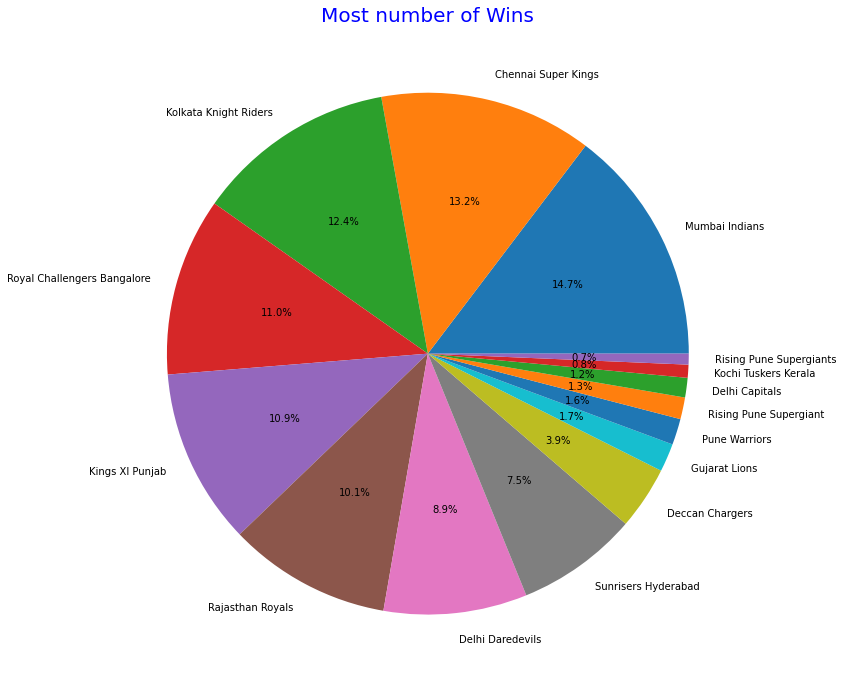

In [13]:
winners=pd.DataFrame({"Winner" : matches['winner']}) 
win=winners.value_counts() 
labels=[x[0] for x in win.keys()] 
bar,ax=plt.subplots(figsize=(20,12)) 
ax=plt.pie(x=win,autopct='%.1f%%',labels=labels) 
plt.title('Most number of Wins',fontsize=20,color="blue") 
plt.show()

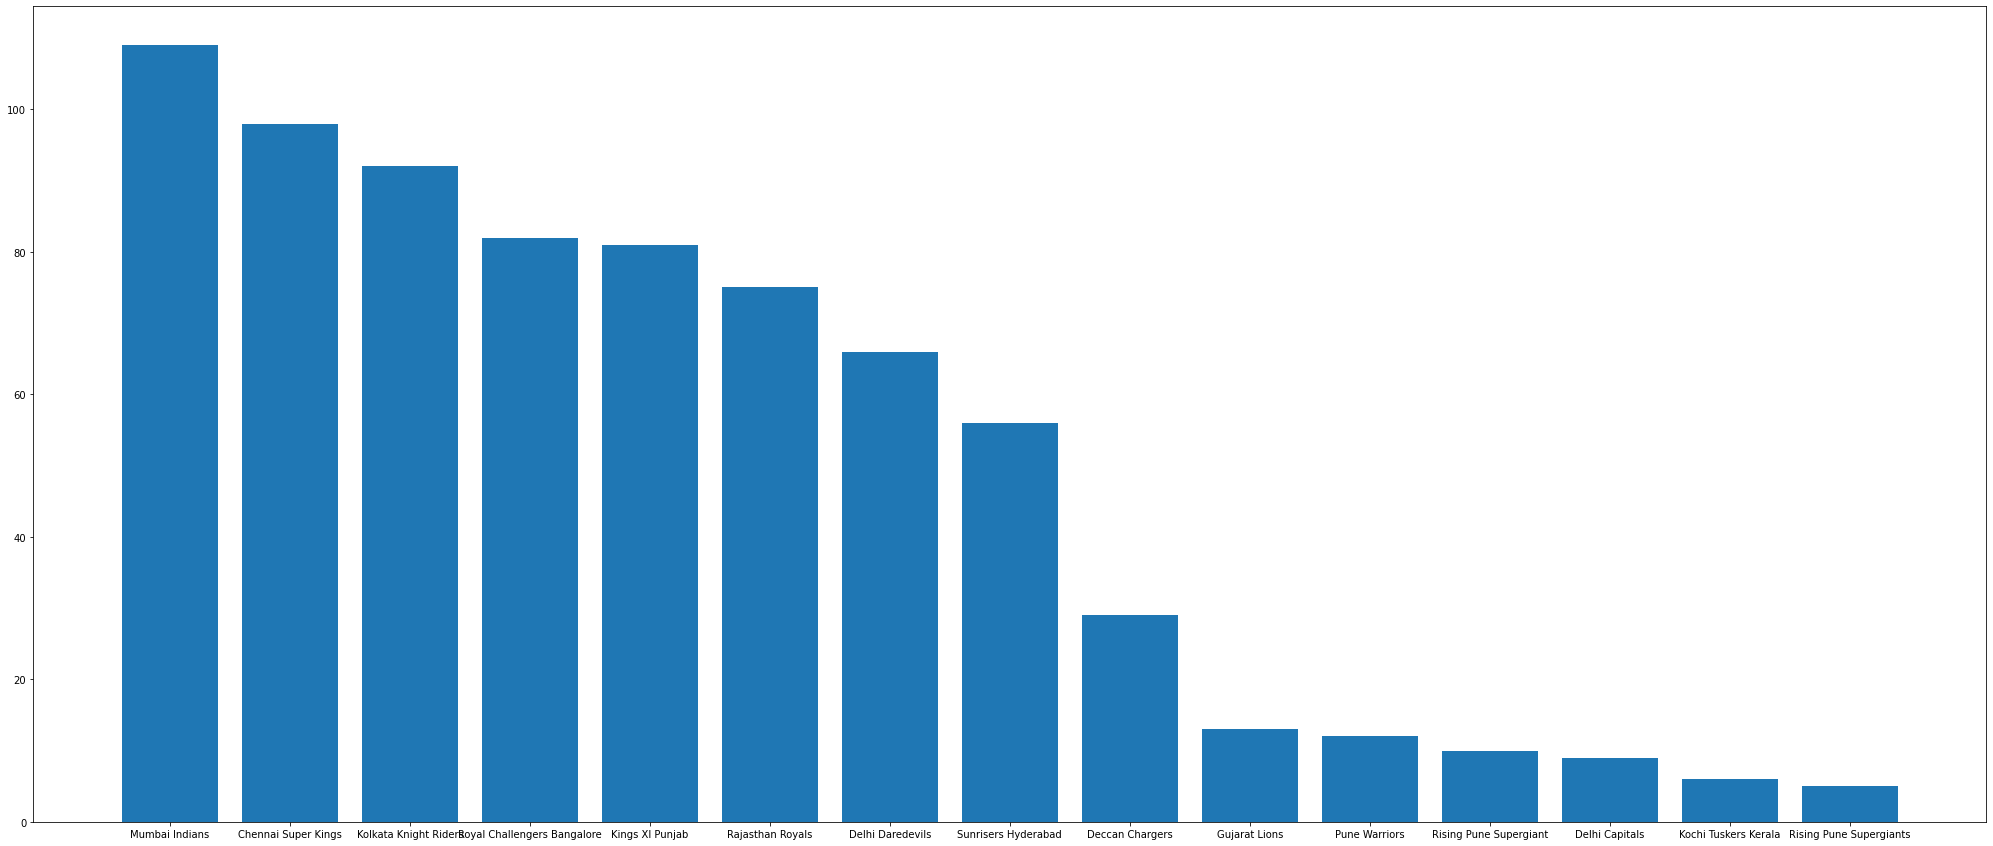

In [14]:
plt.figure(figsize =(35,15)) 
plt.bar(labels,win) 
plt.show()

### Toss Results

In [15]:
teams=matches['toss_winner'].unique() 
decision_making=pd.DataFrame([],columns=['Toss Winner','Decision','Times']) 
for id,element in enumerate(teams): 
    bat=matches[(matches['toss_winner']==element) & (matches['toss_decision']=='bat')] 
    field=matches[(matches['toss_winner']==element) & (matches['toss_decision']=='field')]
    
    decision_making=decision_making.append({'Toss Winner':element,'Decision':'bat','Times':bat['toss_winner'].count()},
                                       ignore_index=True)
    decision_making=decision_making.append({'Toss Winner':element,'Decision':'field','Times':bat['toss_winner'].count()},
                                       ignore_index=True)
decision_making

,Toss Winner,Decision,Times
0,Royal Challengers Bangalore,bat,19
1,Royal Challengers Bangalore,field,19
2,Rising Pune Supergiant,bat,0
3,Rising Pune Supergiant,field,0
4,Kolkata Knight Riders,bat,29
5,Kolkata Knight Riders,field,29
6,Kings XI Punjab,bat,26
7,Kings XI Punjab,field,26
8,Sunrisers Hyderabad,bat,19
9,Sunrisers Hyderabad,field,19


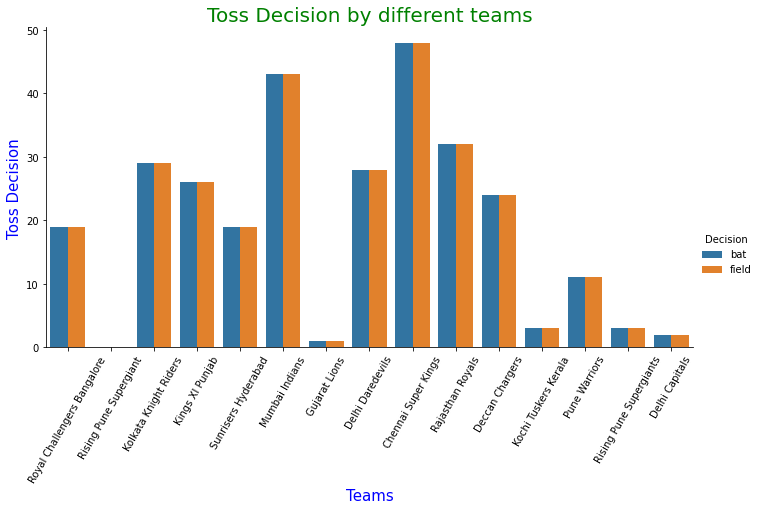

In [16]:
sns.catplot(x='Toss Winner',y='Times',hue='Decision',data=decision_making,kind='bar',height=5,aspect=2) 
plt.xticks(rotation=60) 
plt.title('Toss Decision by different teams',fontsize=20,color="green",) 
plt.xlabel('Teams',fontsize=15,color="blue") 
plt.ylabel('Toss Decision',fontsize=15,color="blue") 
plt.show()

### Top 10 Successful Players in IPL

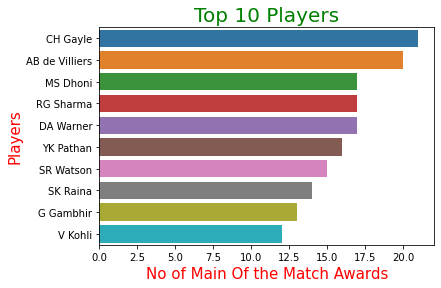

In [17]:
sns.barplot(x=matches['player_of_match'].value_counts().head(10).values, 
            y=matches['player_of_match'].value_counts().head(10).index,data=matches) 
plt.title('Top 10 Players',fontsize=20,color="green") 
plt.xlabel('No of Main Of the Match Awards',fontsize=15,color="red") 
plt.ylabel('Players',fontsize=15,color="red") 
plt.show()

### Top 10 Famous Venues

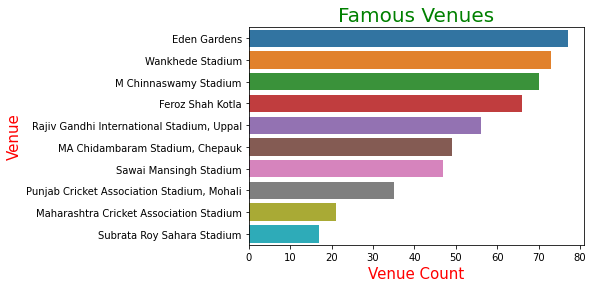

In [18]:
sns.barplot(x=matches['venue'].value_counts().head(10).values,
            y=matches['venue'].value_counts().head(10).index,data=matches) 
plt.title('Famous Venues',fontsize=20,color="green") 
plt.xlabel('Venue Count',fontsize=15,color="red") 
plt.ylabel('Venue',fontsize=15,color="red") 
plt.show()

### Top Five 1st Umpires

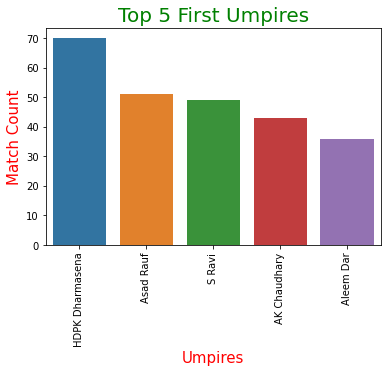

In [20]:
sns.barplot(x=matches['umpire1'].value_counts().head().index,
            y=matches['umpire1'].value_counts().head().values,data=matches) 
plt.xticks(rotation=90) 
plt.title('Top 5 First Umpires',fontsize=20,color="green") 
plt.xlabel('Umpires',fontsize=15,color="red") 
plt.ylabel('Match Count',fontsize=15,color="red") 
plt.show()

### Top Five 2nd Umpires

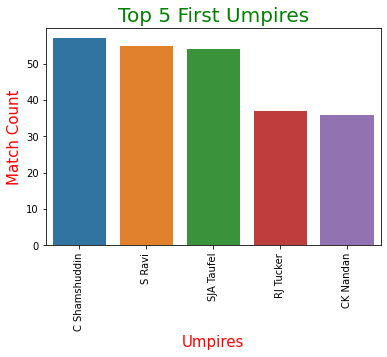

In [21]:
sns.barplot(x=matches['umpire2'].value_counts().head().index,y=matches['umpire2'].value_counts().head().values,data=matches) 
plt.xticks(rotation=90) 
plt.title('Top 5 First Umpires',fontsize=20,color="green") 
plt.xlabel('Umpires',fontsize=15,color="red") 
plt.ylabel('Match Count',fontsize=15,color="red") 
plt.show()

### Best 10 Players for Companies 'Endorsement'

In [22]:
matches['player_of_match'].value_counts().head(10).index

Index(['CH Gayle', 'AB de Villiers', 'MS Dhoni', 'RG Sharma', 'DA Warner',
       'YK Pathan', 'SR Watson', 'SK Raina', 'G Gambhir', 'V Kohli'],
      dtype='object')

### Best 3 Teams for companies 'Endorsement'

In [23]:
matches['winner'].value_counts().head(3).index

Index(['Mumbai Indians', 'Chennai Super Kings', 'Kolkata Knight Riders'], dtype='object')

### Checking no-ball and wide-ball runs

In [25]:
test=deliveries['bowling_team'].unique() 
extra_runs=pd.DataFrame([],columns=['Bowling Team','noball_runs','wide_runs']) 
for id,element in enumerate(test): 
    noball_runs=deliveries[(deliveries['bowling_team']==element) & (deliveries['noball_runs']>0)] 
    wide_runs=deliveries[(deliveries['bowling_team']==element) & (deliveries['wide_runs']>0)] 
    extra_runs=extra_runs.append({'Bowling Team':element,'noball_runs':noball_runs['bowling_team'].count(),'wide_runs': 
    wide_runs['bowling_team'].count()},ignore_index=True) 
extra_runs

,Bowling Team,noball_runs,wide_runs
0,Royal Challengers Bangalore,91,708
1,Sunrisers Hyderabad,30,315
2,Rising Pune Supergiant,1,62
3,Mumbai Indians,105,734
4,Kolkata Knight Riders,77,586
5,Gujarat Lions,7,91
6,Kings XI Punjab,96,658
7,Delhi Daredevils,86,550
8,Chennai Super Kings,59,568
9,Rajasthan Royals,68,570


### Plotting the Graph for no-ball runs by different Teams

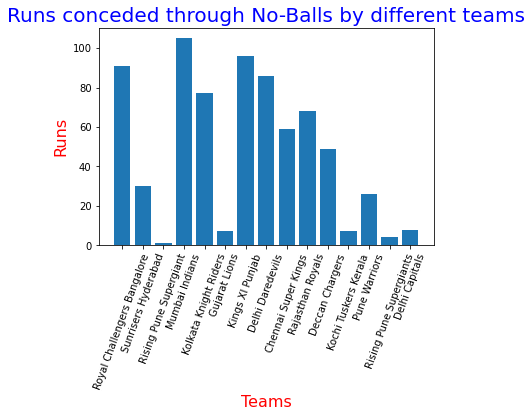

In [26]:
plt.bar(extra_runs['Bowling Team'],extra_runs['noball_runs']) 
plt.xticks(rotation=70) 
plt.title('Runs conceded through No-Balls by different teams',color="blue",fontsize=20) 
plt.xlabel('Teams',color="red",fontsize=16) 
plt.ylabel('Runs',color="red",fontsize=16) 
plt.show()

### Plotting the Graph for wide-ball runs by different Teams

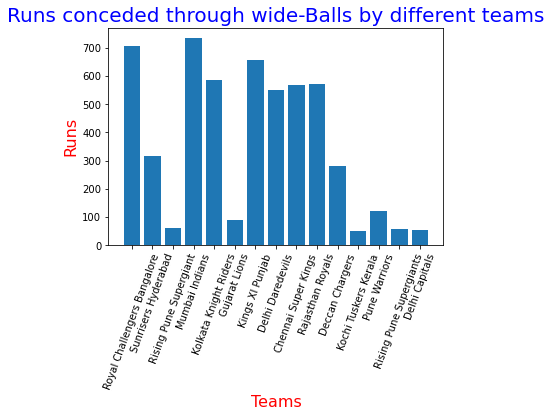

In [27]:
plt.bar(extra_runs['Bowling Team'],extra_runs['wide_runs']) 
plt.xticks(rotation=70) 
plt.title('Runs conceded through wide-Balls by different teams',color="blue",fontsize=20) 
plt.xlabel('Teams',color="red",fontsize=16) 
plt.ylabel('Runs',color="red",fontsize=16) 
plt.show()